In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


**Splitting the dataset into the Training set and Test set**

### Encoding the values of  Gender

In [4]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

In [5]:
x = df.iloc[ : , 1:4]
x.head(3)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000


In [6]:
y = df['Purchased']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

**Feature Scaling**

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaling = MinMaxScaler()

In [11]:
scaling.fit_transform(x_train)

array([[0.        , 0.69047619, 0.26666667],
       [0.        , 0.64285714, 0.85925926],
       [0.        , 0.02380952, 0.04444444],
       [0.        , 0.38095238, 0.42222222],
       [0.        , 0.42857143, 0.82222222],
       [1.        , 0.38095238, 0.74074074],
       [0.        , 0.85714286, 0.65925926],
       [0.        , 0.4047619 , 0.60740741],
       [1.        , 0.33333333, 0.02222222],
       [0.        , 0.97619048, 0.5037037 ],
       [0.        , 0.78571429, 0.88148148],
       [1.        , 0.45238095, 0.40740741],
       [0.        , 0.35714286, 0.26666667],
       [0.        , 0.11904762, 0.0962963 ],
       [1.        , 0.33333333, 0.62962963],
       [1.        , 0.47619048, 0.32592593],
       [0.        , 0.47619048, 0.71851852],
       [0.        , 0.4047619 , 0.33333333],
       [1.        , 0.52380952, 0.46666667],
       [0.        , 0.5952381 , 0.87407407],
       [1.        , 0.16666667, 0.05185185],
       [0.        , 0.83333333, 0.14074074],
       [0.

**Fitting Random Forest to the Training set**

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(criterion='entropy', max_depth=2)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2)

**Predicting the Test set results**

In [17]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

**Making the Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[47,  3],
       [ 1, 29]], dtype=int64)

In [23]:
import seaborn as sns

<AxesSubplot: >

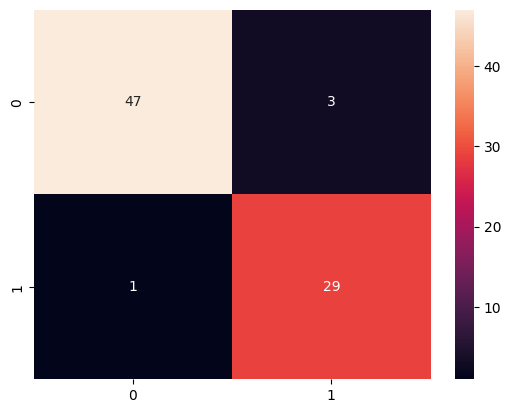

In [25]:
sns.heatmap(cm, annot=True)

**Visualising the Training set results**

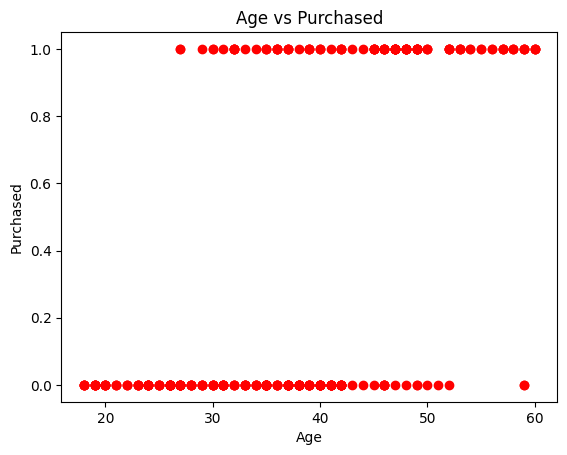

In [26]:
plt.scatter(x_train.Age, y_train, color = 'Red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
plt.show()

In [ ]:
plt.scatter(x_train.EstimatedSalary, y_train, color = 'Red')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Estimated salary vs Purchased')
plt.show()

**Visualising the Test set results**

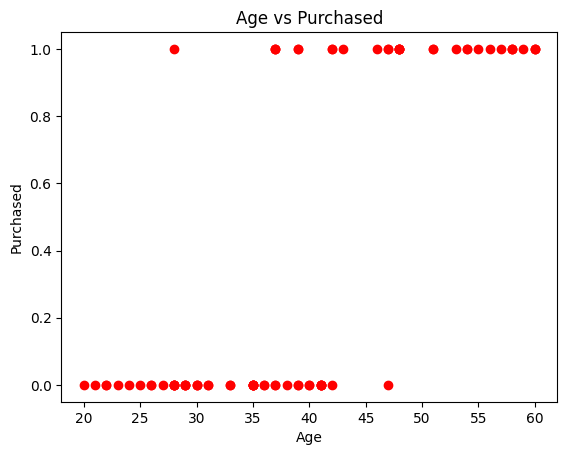

In [27]:
plt.scatter(x_test.Age, y_test, color = 'Red')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
plt.show()

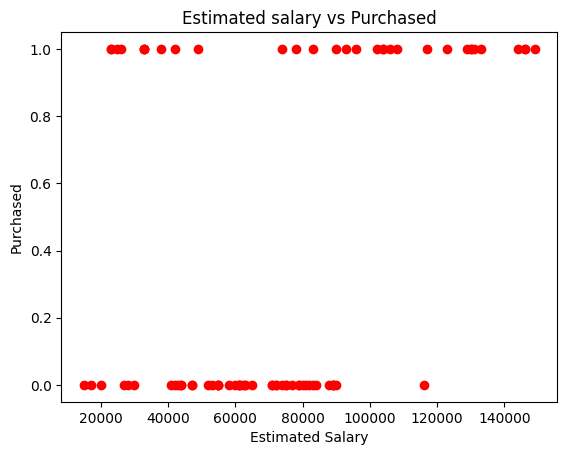

In [28]:
plt.scatter(x_test.EstimatedSalary, y_test, color = 'Red')
plt.xlabel('Estimated Salary')
plt.ylabel('Purchased')
plt.title('Estimated salary vs Purchased')
plt.show()